In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

In [0]:
env = gym.make("FrozenLake-v0")
action_num = env.action_space.n
obs_num = env.observation_space.n

In [0]:
# Learning Parameters
episodes_num = 10000
learning_rate = 0.1
max_steps = 99
discount = 0.94
epsilon = 1.0
epsilon_min = 0.1
epsilon_max = 1.0
decay_rate = 0.001

In [0]:
q1_table = np.zeros((obs_num, action_num))
q2_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [10]:
rewards = []
steps_till_success = []

for episode in range(episodes_num):
  state = env.reset()
  reward = 0
  step = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q1_table[state,:] + q1_table[state,:])
    else:
      action = env.action_space.sample()

    # Perform it
    new_state, reward, done, _ = env.step(action)

    if reward == 0 and done == True:
      reward = -1
    elif done == False:
      reward = 0
    else:
      reward = 1

    # Update q-table
    a1_max = np.argmax(q1_table[new_state, :])
    a2_max = np.argmax(q2_table[new_state, :])

    if random.uniform(0,1) > 0.5:
      q1_table[state, action] = q1_table[state, action] + learning_rate * (reward + 
                  discount * q2_table[new_state, a1_max] - q1_table[state, action])
    else:
      q2_table[state, action] = q2_table[state, action] + learning_rate * (reward + 
                  discount * q1_table[new_state, a2_max] - q2_table[state, action])
    state = new_state

    cumul_rewards += reward
    if reward > 0:
      steps_till_success.append(step + 1)

    if done == True:
      break

  if cumul_rewards < 1:
    steps_till_success.append(max_steps + 1)
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 
  rewards.append(cumul_rewards)

env.close()
print(f'Average reward:{sum(rewards)/episodes_num}')
print(f'Min step to success: {min(steps_till_success)}')

Average reward:-0.3875
Min step to success: 6


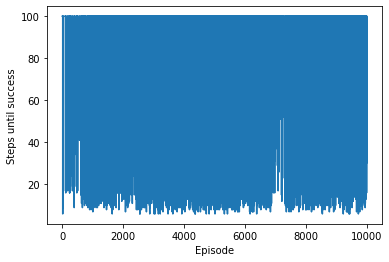

In [11]:
plt.plot(steps_till_success)
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

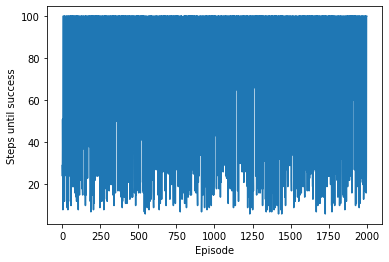

In [12]:
plt.plot(steps_till_success[7999:10000])
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

In [13]:
print(q1_table)

[[ 0.09766811  0.08866424  0.0915053   0.0838888 ]
 [-0.14482431 -0.45666703 -0.34485188  0.06014928]
 [-0.10238372 -0.01113463 -0.05925066  0.04118519]
 [-0.24691724 -0.476908   -0.25720487  0.03272839]
 [ 0.11364771 -0.42743094 -0.23003826 -0.37188269]
 [ 0.          0.          0.          0.        ]
 [-0.45158794 -0.68093168 -0.22384703 -0.69948158]
 [ 0.          0.          0.          0.        ]
 [-0.21061554 -0.13043063 -0.20284636  0.14319371]
 [-0.06151088  0.22044143 -0.0385125  -0.20115833]
 [ 0.1966407  -0.23443902 -0.31652154 -0.18791712]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.10282091 -0.09611099  0.32182384 -0.04925941]
 [ 0.31437422  0.66061042  0.50079326  0.40712988]
 [ 0.          0.          0.          0.        ]]


In [14]:
print(q2_table)

[[ 0.1000492   0.07851567  0.07616359  0.07771895]
 [-0.53714815 -0.11126123 -0.22605075  0.06307474]
 [-0.09648448 -0.04605488 -0.13903257  0.03721503]
 [-0.47177571 -0.26286393 -0.22865195  0.03300671]
 [ 0.11120424 -0.54121414 -0.07061267 -0.22127149]
 [ 0.          0.          0.          0.        ]
 [-0.26090326 -0.73653875 -0.27963031 -0.64845913]
 [ 0.          0.          0.          0.        ]
 [-0.08327469 -0.31105796 -0.20780877  0.15491683]
 [-0.05402919  0.20253859 -0.34883883 -0.38408867]
 [ 0.23884744 -0.24840537 -0.26189969 -0.42398902]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.24269212 -0.18912573  0.32330316  0.07457706]
 [ 0.37816522  0.53197178  0.66826734  0.39745356]
 [ 0.          0.          0.          0.        ]]


In [17]:
q_table = q1_table + q2_table

env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps", step + 1)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 15
****************************************************
EPISODE  1
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 28
****************************************************
EPISODE  2
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 37
****************************************************
EPISODE  3
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 45
****************************************************
EPISODE  4
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 15


In [21]:
total_reward = 0
steps = []

for episode in range(100):
    state = env.reset()
    step = 0
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)

        total_reward += reward
        
        if done:
          if reward > 0:
            steps.append(step + 1)
          # else:
          #   step.append(max_steps + 1)
          break
        state = new_state
env.close()

print(f'Successful runs out of 100: {total_reward}')
print(f'Average steps: {np.mean(steps)}')

Successful runs out of 100: 74.0
Average steps: 40.445945945945944
